In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

 Importing the data set and checking the head of data set

In [2]:
bike_raw_data = pd.DataFrame(pd.read_csv("day.csv"))

In [3]:
bike_raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
print(bike_raw_data.shape)

(730, 16)


Quality Check
    

In [6]:
bike_raw_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

since cnt has bot casual and registered user counts included, and there isnt a need to seperately analyse them in this scenerio, casual and registered fields can be excluded.

In [7]:
bike_raw_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike_sharing_data=bike_raw_data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [9]:
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
month_mapping = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
week_mapping = {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
weather_mapping = {1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}

bike_sharing_data['season'] = bike_sharing_data['season'].map(season_mapping)
bike_sharing_data['mnth'] = bike_sharing_data['mnth'].map(month_mapping)
bike_sharing_data['weekday'] = bike_sharing_data['weekday'].map(week_mapping)
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].map(weather_mapping)

bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


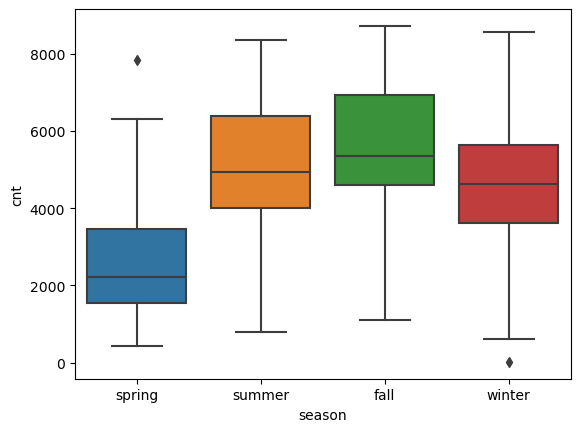

In [10]:
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_data)
plt.show()

# Performing EDA

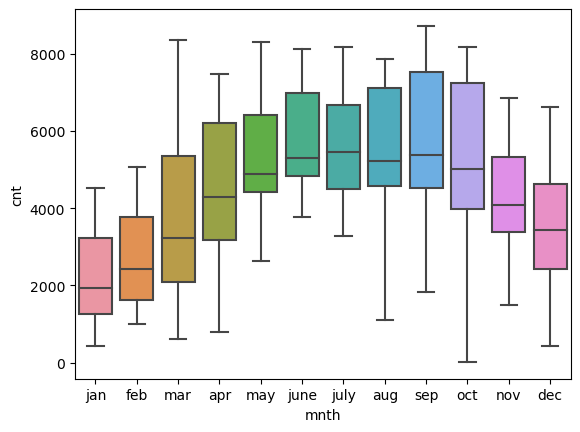

In [11]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_data)
plt.show()

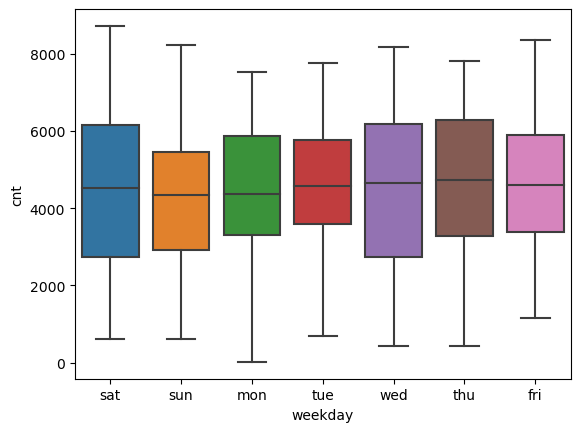

In [12]:
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_data)
plt.show()

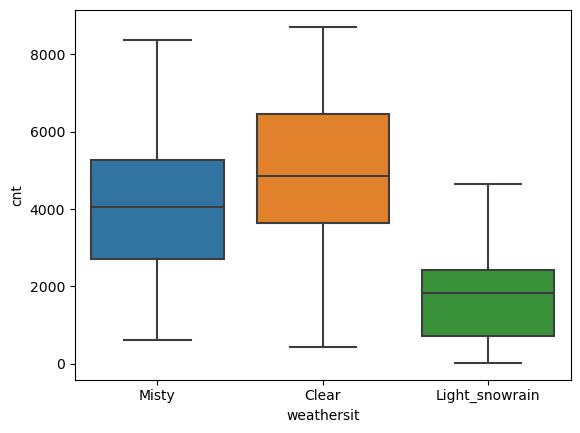

In [13]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_data)
plt.show()

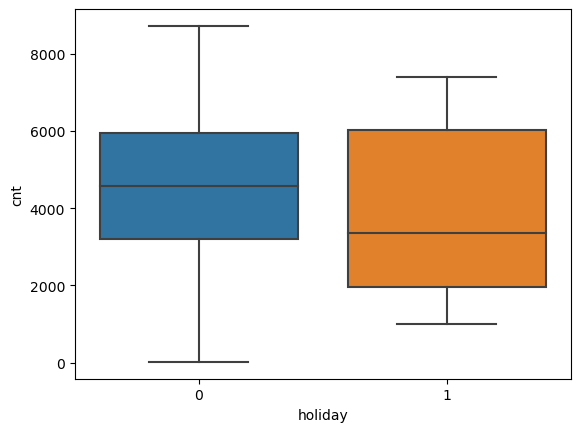

In [14]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_data)
plt.show()

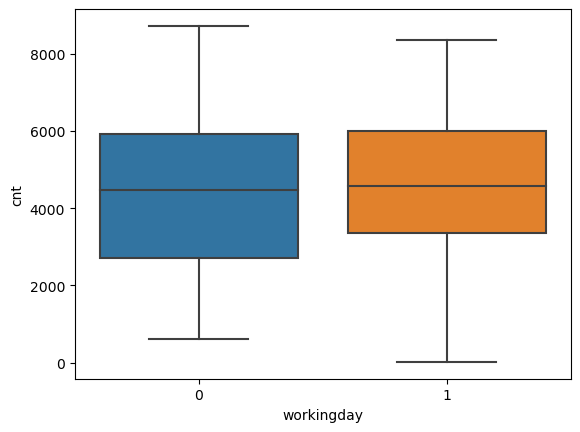

In [15]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_data)
plt.show()

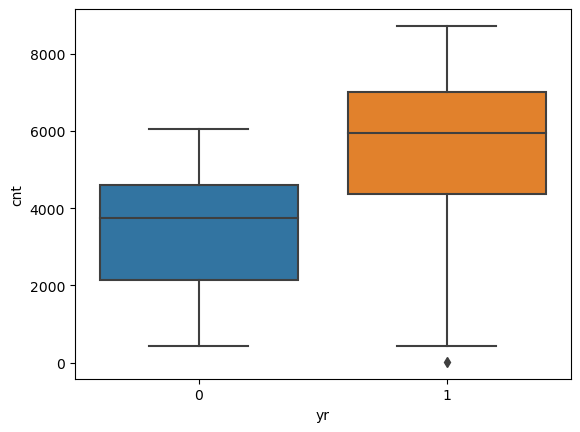

In [16]:
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_data)
plt.show()

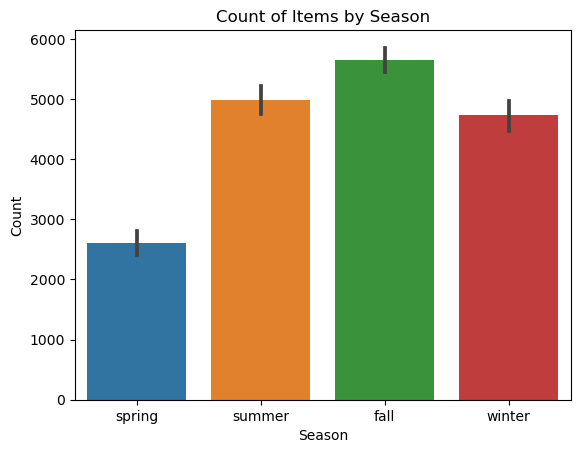

In [17]:
sns.barplot(x="season", y="cnt", data=bike_sharing_data)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count of Items by Season")
plt.show()

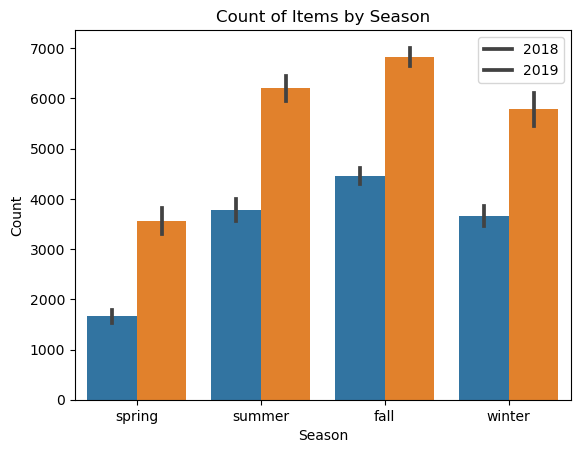

In [18]:
sns.barplot(x="season", y="cnt",hue="yr", data=bike_sharing_data)
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(labels=['2018', '2019'])
plt.title("Count of Items by Season")
plt.show()

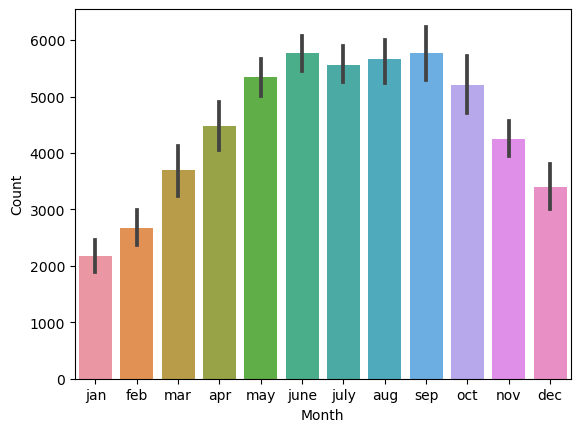

In [19]:
sns.barplot(x="mnth", y="cnt", data=bike_sharing_data)
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

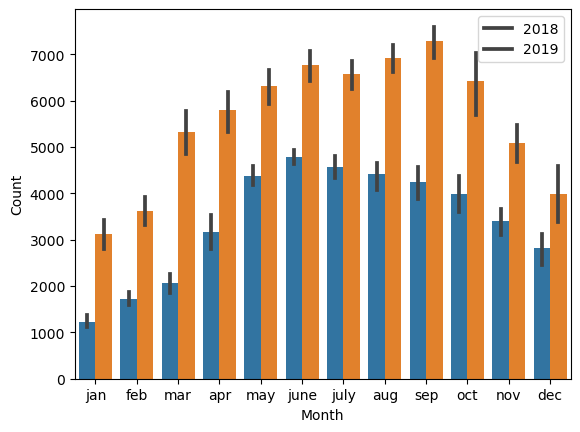

In [20]:
sns.barplot(x="mnth", y="cnt",hue="yr", data=bike_sharing_data)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(labels=['2018', '2019'])
plt.show()

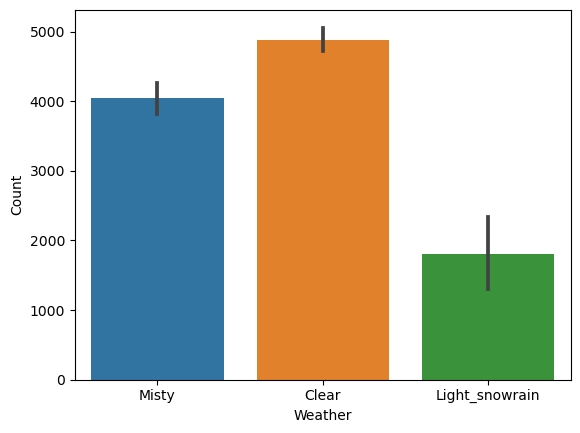

In [21]:
sns.barplot(x="weathersit", y="cnt", data=bike_sharing_data)
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

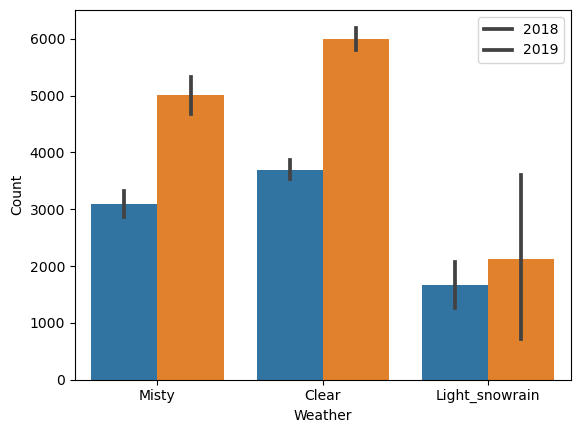

In [22]:
sns.barplot(x="weathersit", y="cnt",hue="yr", data=bike_sharing_data)
plt.xlabel("Weather")
plt.ylabel("Count")
plt.legend(labels=['2018', '2019'])
plt.show()

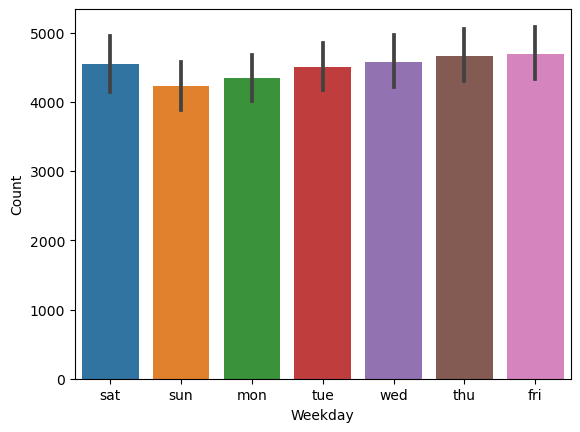

In [23]:
sns.barplot(x="weekday", y="cnt", data=bike_sharing_data)
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

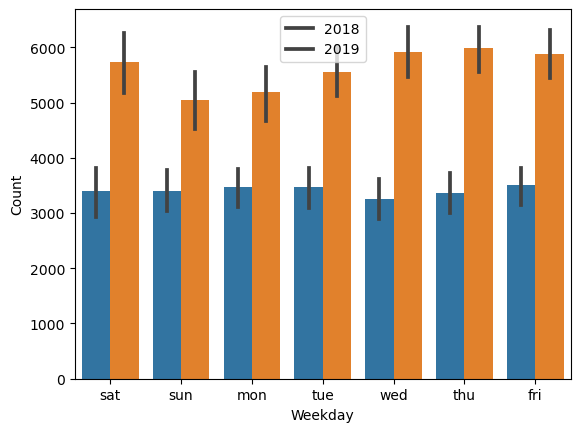

In [24]:
sns.barplot(x="weekday", y="cnt",hue="yr", data=bike_sharing_data)
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.legend(labels=['2018', '2019'])
plt.show()

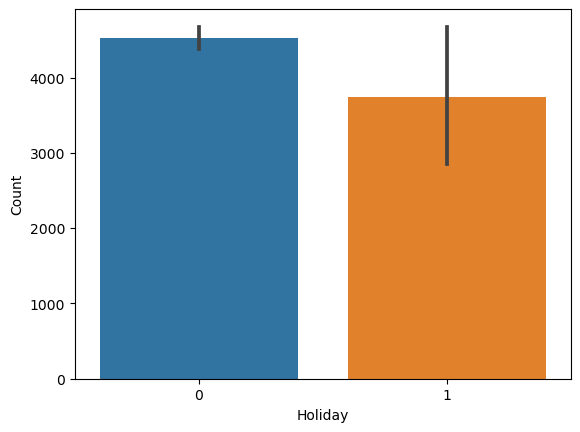

In [25]:
sns.barplot(x="holiday", y="cnt", data=bike_sharing_data)
plt.xlabel("Holiday")
plt.ylabel("Count")
plt.show()

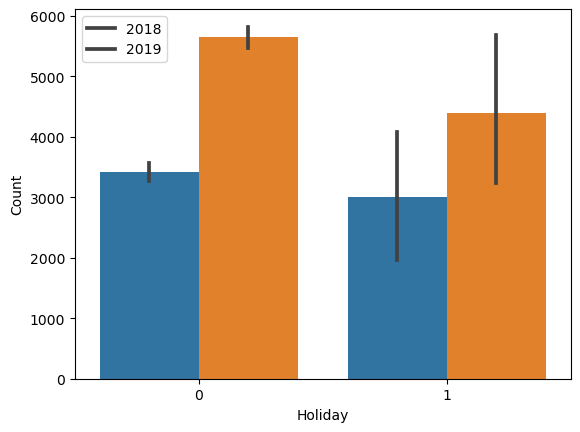

In [26]:
sns.barplot(x="holiday", y="cnt",hue="yr", data=bike_sharing_data)
plt.xlabel("Holiday")
plt.ylabel("Count")
plt.legend(labels=['2018', '2019'])
plt.show()

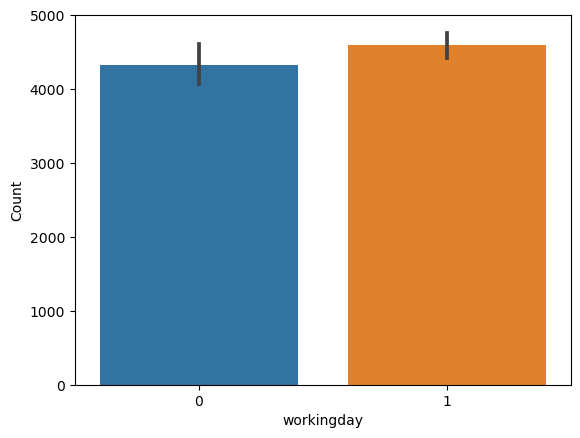

In [27]:
sns.barplot(x="workingday", y="cnt", data=bike_sharing_data)
plt.xlabel("workingday")
plt.ylabel("Count")
plt.show()

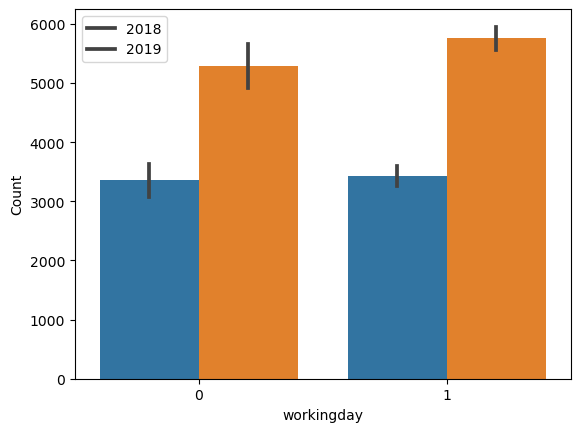

In [28]:
sns.barplot(x="workingday", y="cnt",hue="yr", data=bike_sharing_data)
plt.xlabel("workingday")
plt.ylabel("Count")
plt.legend(labels=['2018', '2019'])
plt.show()

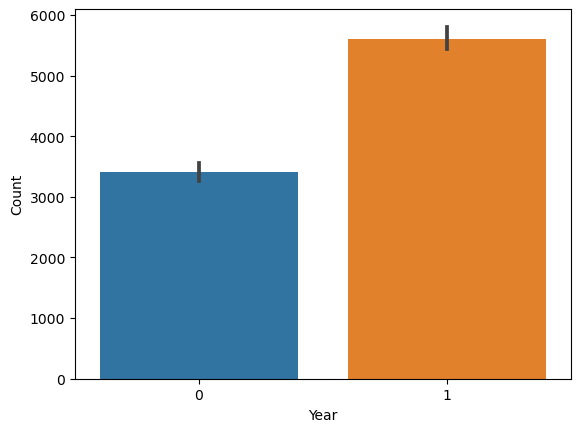

In [29]:
sns.barplot(x="yr", y="cnt", data=bike_sharing_data)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

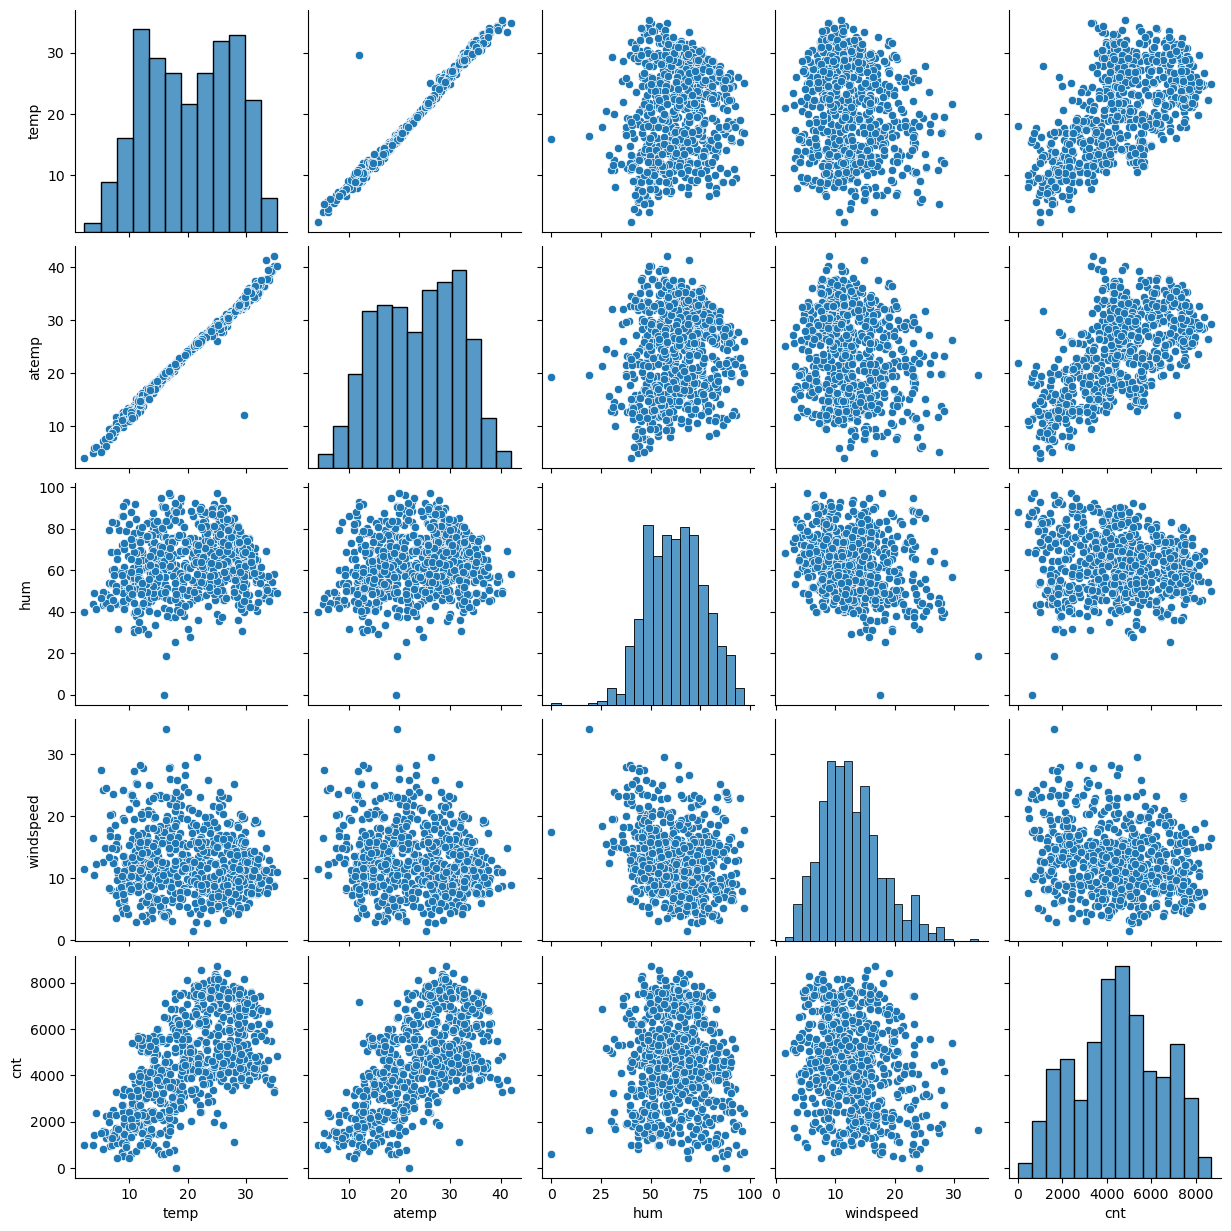

In [30]:
sns.pairplot(data=bike_sharing_data,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

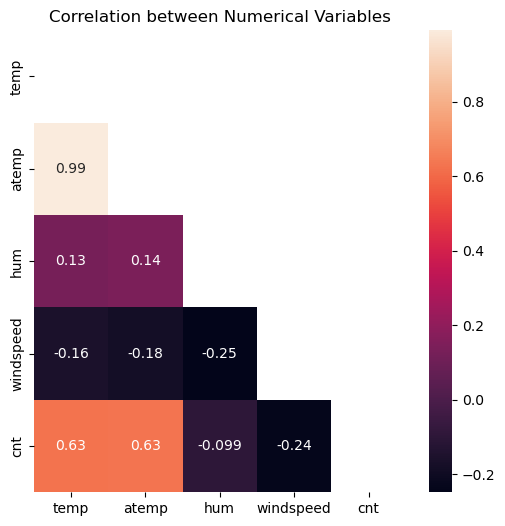

In [31]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike_sharing_data[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_sharing_data[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

## Dummy Variables

In [32]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [33]:
# Dummy variable creation for month, weekday, weathersit and season variables.

# months_bike=pd.get_dummies(bike_sharing_data.mnth,drop_first=True)
# weekdays_bike=pd.get_dummies(bike_sharing_data.weekday,drop_first=True)
# weathersit_bike=pd.get_dummies(bike_sharing_data.weathersit,drop_first=True)
# seasons_bike=pd.get_dummies(bike_sharing_data.season,drop_first=True)
# bike_sharing_data.head()
bike_sharing_data = pd.get_dummies(bike_sharing_data, drop_first=True)
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  mnth_aug                   730 non-null    uint8  
 12  mnth_dec                   730 non-null    uint8  
 13  mnth_feb                   730 non-null    uint8  

## Splitting variables
    

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
df_train, df_test =  train_test_split(bike_sharing_data, train_size =0.7 , random_state = 100 )

print(df_test.shape)
print(df_train.shape)

(220, 30)
(510, 30)


   ## Rescaling the features

We will use Normalisation (Min Max scaling) here to rescale the values

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
#initiate object
scaler = MinMaxScaler()

#create list of numeric variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
# fit data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


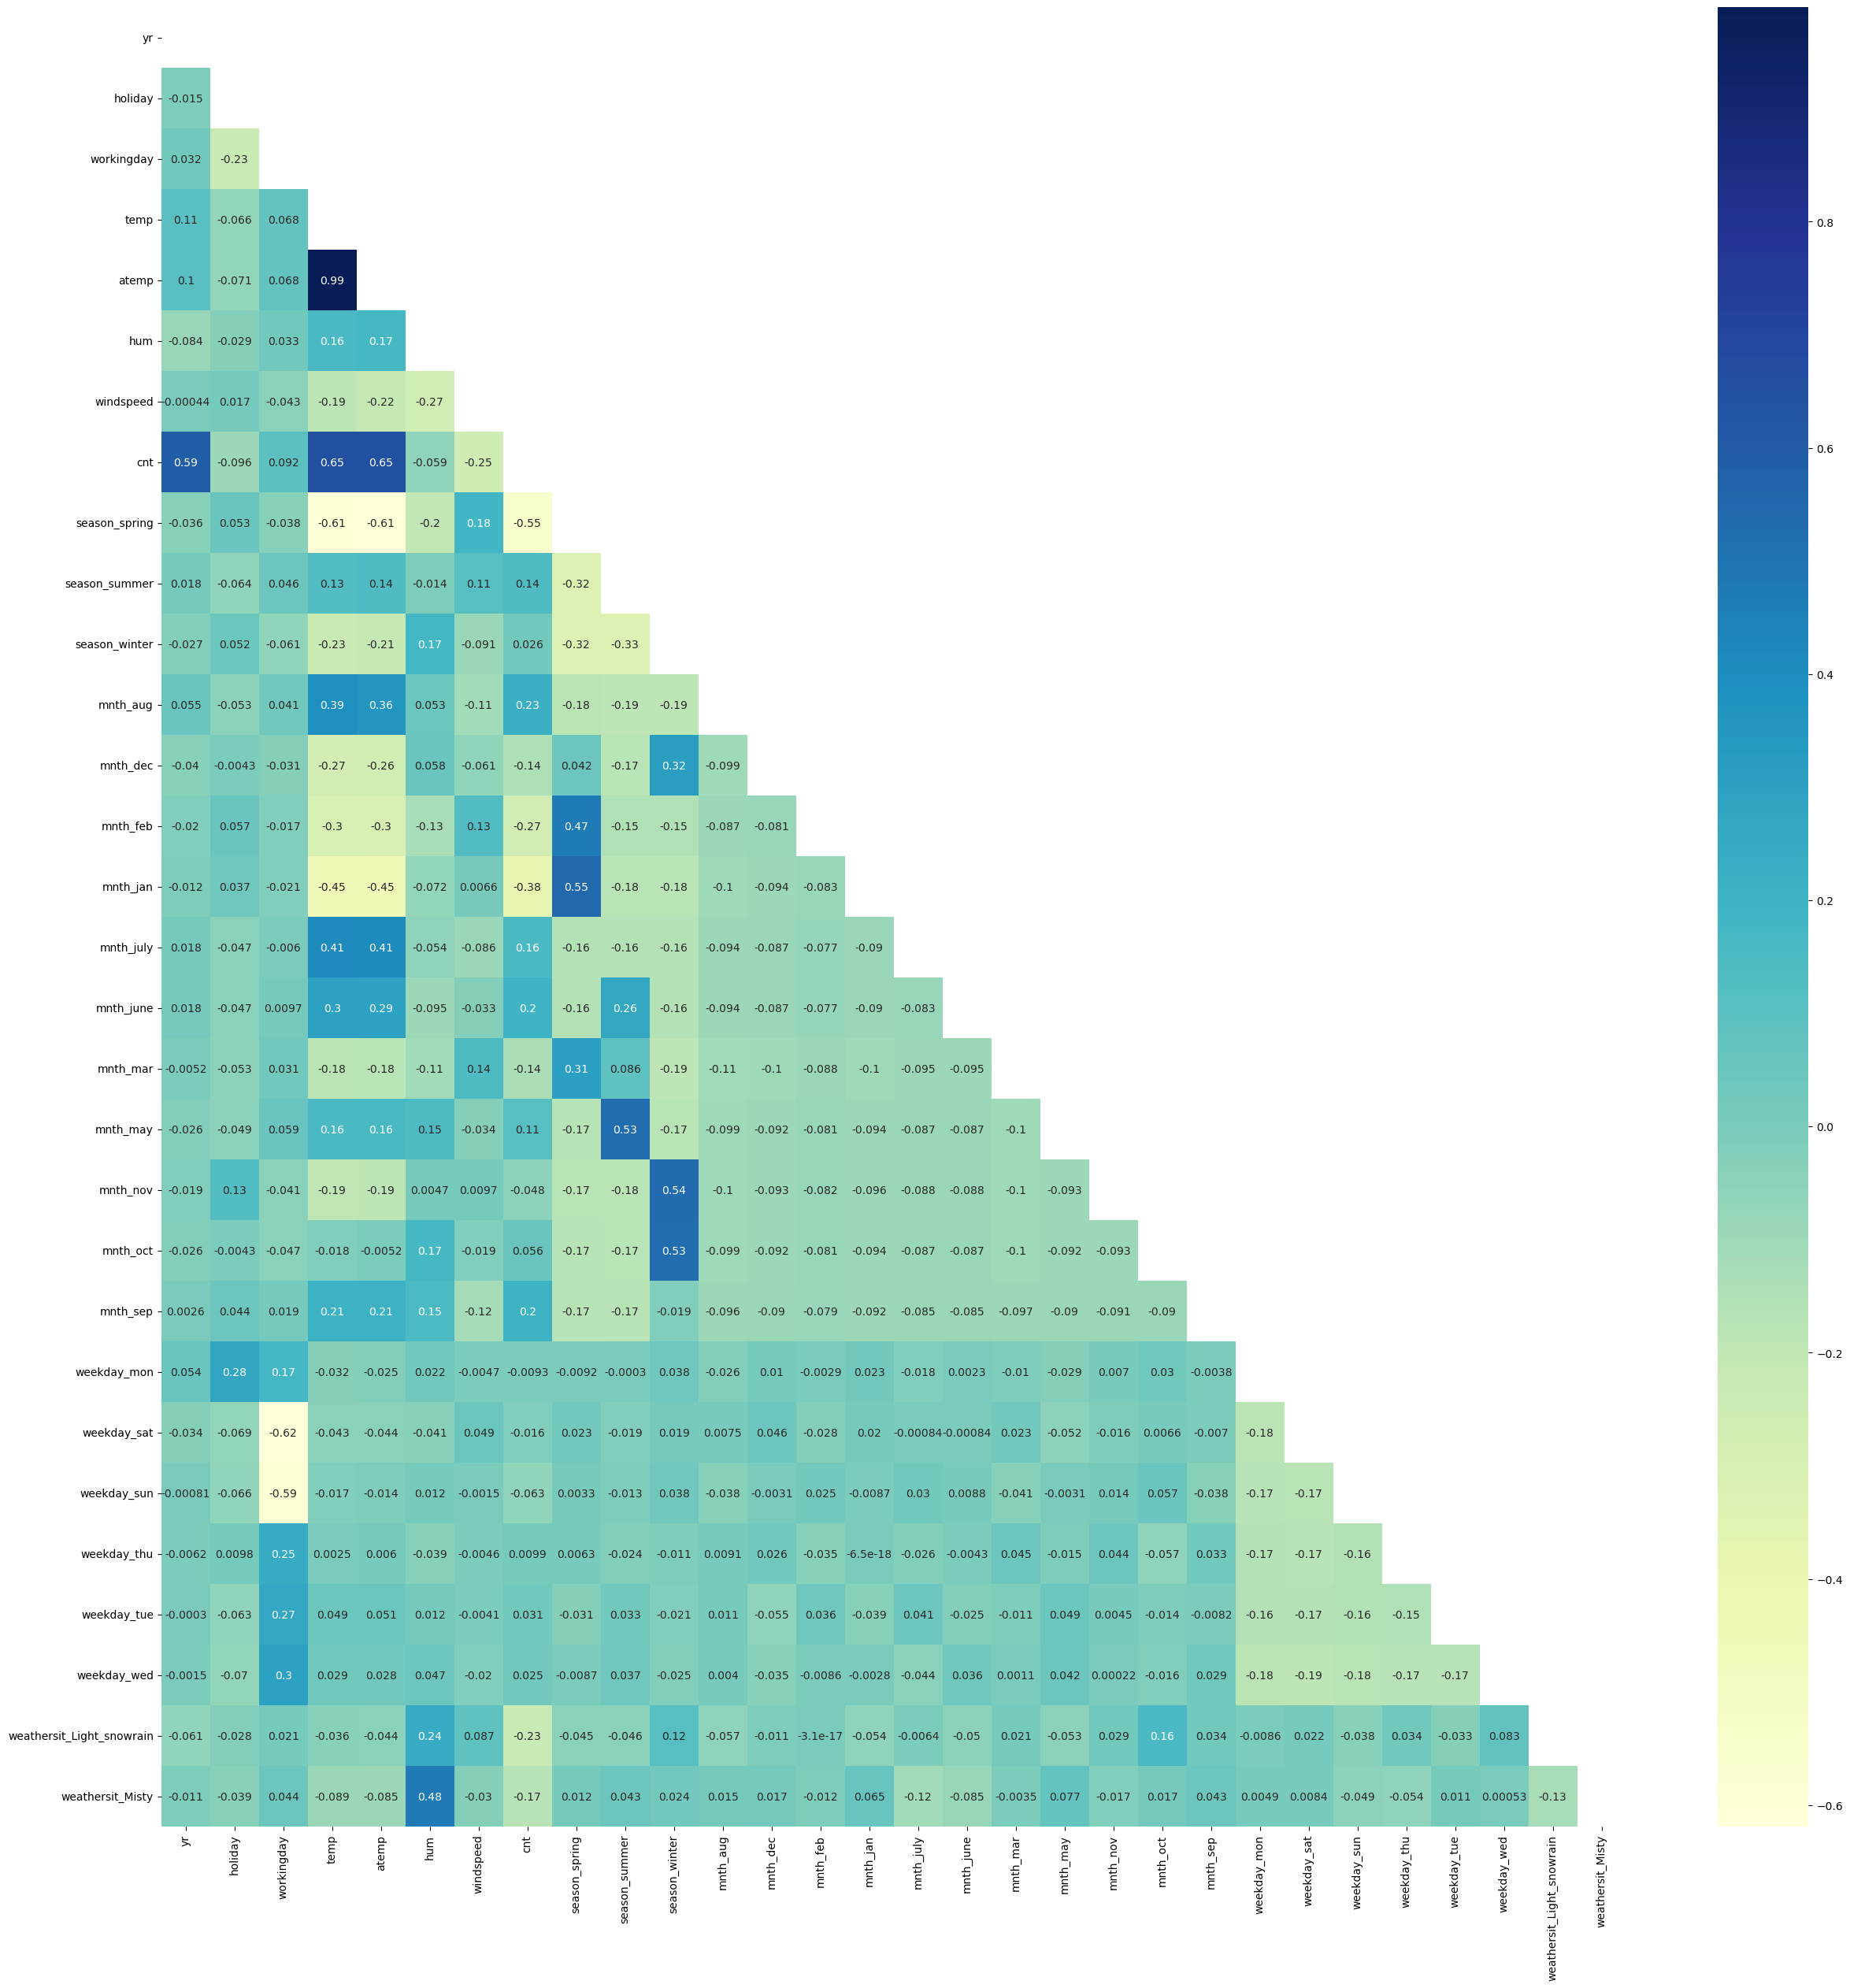

In [40]:
#check correlation
plt.figure(figsize = (30,30))

matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

cnt shows a high correlation with year , temp and atemp variable. humidity (hum) shows good correlation between weather misty. November and October are having good correlation to season Winter , January and Februray with Spring , May for summer . These are the observations that can be made from the above.

since cnt is having highest correlation between temp and atemp both at 0.65, and looks like temp and atemp are highly correlated with each other with 0.99 value, We will take temp to compare with cnt first

### visualizing temperature with cnt to see trend with scatter plot


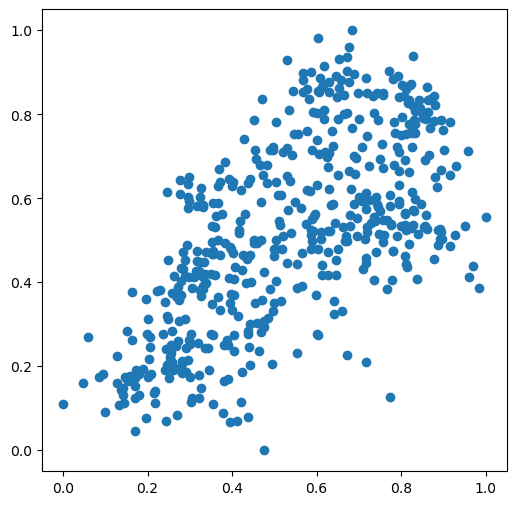

In [41]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Scatter plot confirms that there is a positive correlation between temp and cnt

## Linaer Model Creation

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

#### Adding all variables to the model

In [45]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [46]:
#build model with all variables

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [48]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

# Create an instance of RFE with the estimator (model) and the number of features to select
num_features_to_select = 15
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)

# Fit RFE on your data
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [50]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [52]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [53]:
#VIF calculation function

def generateVIF(val):
    vif = pd.DataFrame()
    vif['Features'] = val.columns
    vif['VIF'] = [variance_inflation_factor(val.values, i) for i in range(val.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [54]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [55]:
generateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_Misty,1.57


workingday shows high VIF value

## Building Linear model

In [56]:
#model 1

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        00:53:31   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [57]:
# As workingday shows high VIF values but holiday is having high P value
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
generateVIF(X_train_new)

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_sat,4.91
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.69
6,season_summer,3.04
13,weathersit_Misty,2.31


hum (humidity) seems to have a very high VIF value

In [58]:
#model 2

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        00:53:31   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [59]:
# here since hum  is showing high VIF value, lets first remove it 
X_train_new_2 = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
generateVIF(X_train_new_2)

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,weekday_sat,4.45
10,weekday_sun,4.21
4,season_spring,3.82
6,season_winter,2.78
5,season_summer,2.76
0,yr,2.07
7,mnth_july,1.60


VIF looks to be good now. Checking to see if it can be reduced

In [60]:
#Model 3
X_train_lm_3 = sm.add_constant(X_train_new_2)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.28e-188
Time:                        00:53:31   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [61]:
# We can drop workingday  variable as it has high VIF
X_train_new_3 = X_train_new_2.drop(['workingday'], axis = 1)

generateVIF(X_train_new_3)


,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,season_summer,2.24
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_july,1.59
11,weathersit_Misty,1.55
7,mnth_sep,1.33
8,weekday_sat,1.22


In [62]:
#Model 4
X_train_lm_4 = sm.add_constant(X_train_new_3)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.06e-186
Time:                        00:53:31   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [63]:
# We can drop workingday  variable as it has high P value
X_train_new_4 = X_train_new_3.drop(['weekday_sat'], axis = 1)

generateVIF(X_train_new_4)


,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_july,1.59
10,weathersit_Misty,1.55
7,mnth_sep,1.33
8,weekday_sun,1.17


In [64]:
#Model 5
X_train_lm_5 = sm.add_constant(X_train_new_4)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.37e-187
Time:                        00:53:31   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [65]:
# We can drop mnth_july  variable as it has high P value
X_train_new_5 = X_train_new_4.drop(['mnth_july'], axis = 1)

generateVIF(X_train_new_5)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
9,weathersit_Misty,1.55
6,mnth_sep,1.22
7,weekday_sun,1.17
8,weathersit_Light_snowrain,1.08


VIF value is now below 5 and seems to be good

In [66]:
#Model 6
X_train_lm_6 = sm.add_constant(X_train_new_5)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.70e-187
Time:                        00:53:31   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

so the Model no 6 can be considered since it has low multicolinearity and P values seem to be significant
F Static value = 249.5, Prob (F-statistic):          5.70e-187 states that overall model is significant

In [67]:

# Checking the parameters and their coefficient values
lr_6.params

const                        0.195618
yr                           0.234391
temp                         0.479457
windspeed                   -0.149843
season_spring               -0.057246
season_summer                0.062339
season_winter                0.093716
mnth_sep                     0.085435
weekday_sun                 -0.046099
weathersit_Light_snowrain   -0.285587
weathersit_Misty            -0.078980
dtype: float64

In [68]:
X_train_lm_6

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_sep,weekday_sun,weathersit_Light_snowrain,weathersit_Misty
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,0,1
111,1.0,0,0.345824,0.380981,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,1,0,0,0,1
79,1.0,0,0.462664,0.529881,0,1,0,0,0,0,1


## Residual Analysis 

In [69]:
y_train_pred = lr_6.predict(X_train_lm_6)

#### Normality of Error terms

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

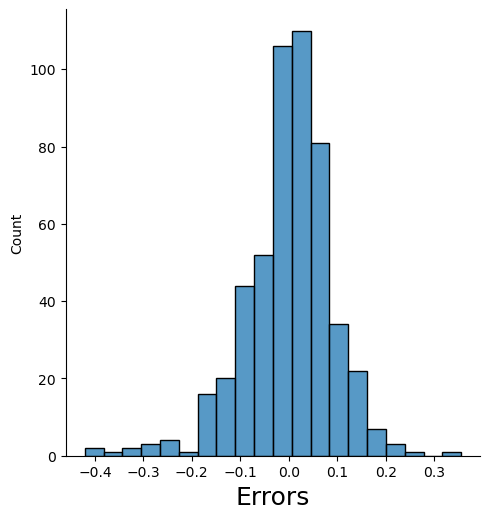

In [70]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.displot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [71]:
generateVIF(X_train_new_5)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
9,weathersit_Misty,1.55
6,mnth_sep,1.22
7,weekday_sun,1.17
8,weathersit_Light_snowrain,1.08


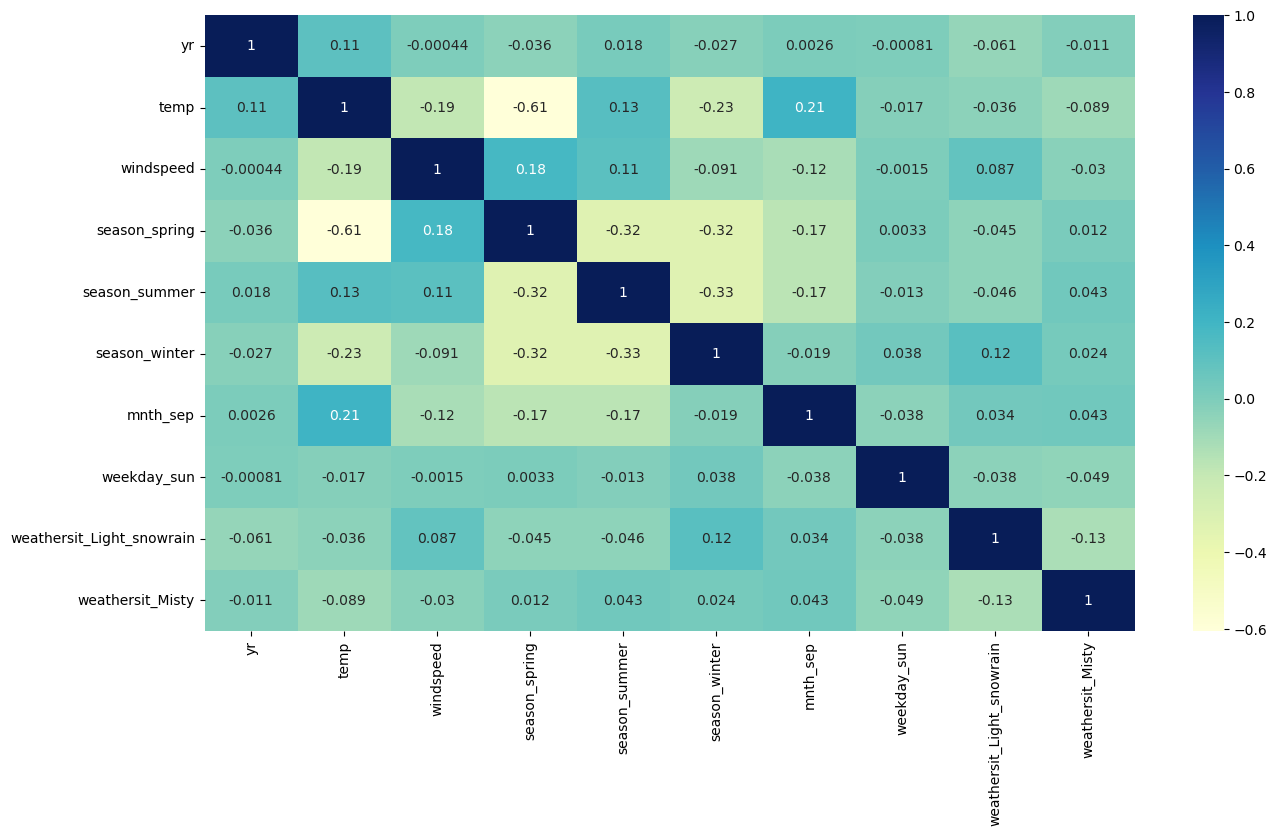

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new_5.corr(),annot = True, cmap="YlGnBu")
plt.show()

from the above chart looks like there is no multicolinearity and VIF is less than 5

#### Linearity


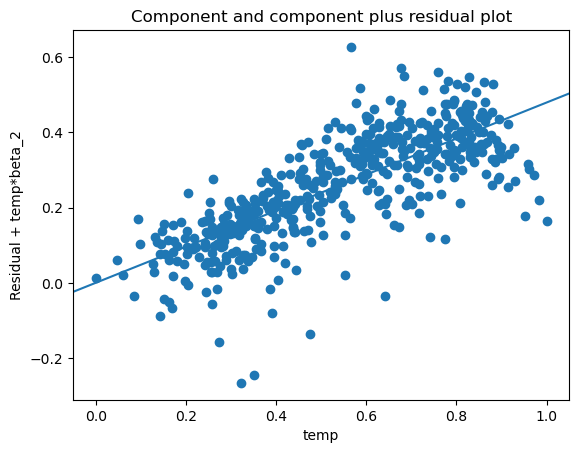

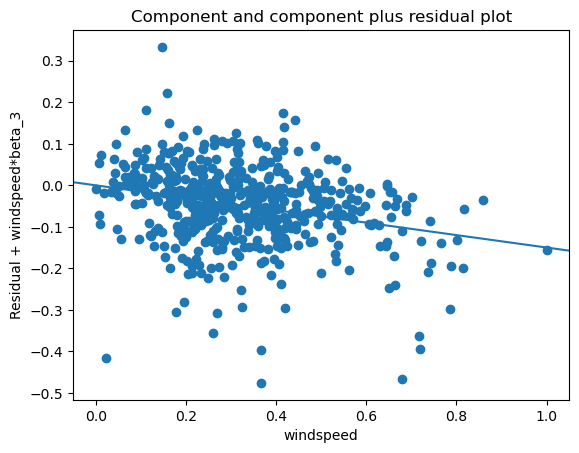

In [73]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()


sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

##  Prediction with Final Model

In [74]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [75]:
y_test = df_test.pop('cnt')
X_test = df_test

In [76]:
col1 = X_train_new_5.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [77]:
y_pred = lr_6.predict(X_test_lm_6)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8032

#### R2 score calculated = 0.8032

## Model Evaluation

Text(0, 0.5, 'y_pred')

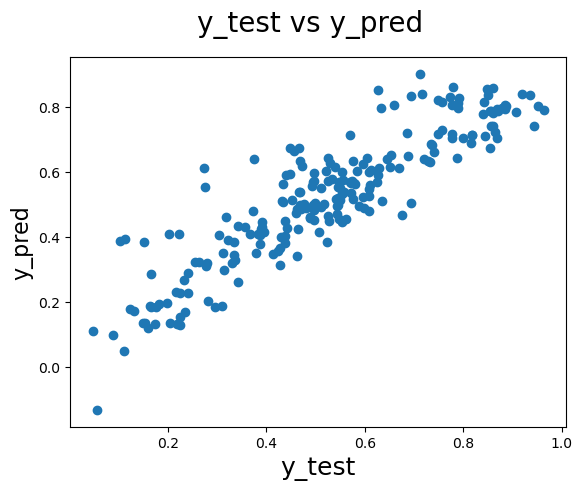

In [78]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [79]:
round(lr_6.params,4)

const                        0.1956
yr                           0.2344
temp                         0.4795
windspeed                   -0.1498
season_spring               -0.0572
season_summer                0.0623
season_winter                0.0937
mnth_sep                     0.0854
weekday_sun                 -0.0461
weathersit_Light_snowrain   -0.2856
weathersit_Misty            -0.0790
dtype: float64

We can see the equation for best fitted line

  cnt = 0.1956 x const + 0.2344 x yr + 0.4795 x temp - 0.1498 x windspeed - 0.0572 x season_spring + 0.0623 x season_summer + 0.0937 x season_winter + 0.0854 x mnth_sep - 0.0461 x weekday_sun - 0.2856 x weathersit_light_snowrain - 0.0790 x weathersit_Misty

In [80]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7938


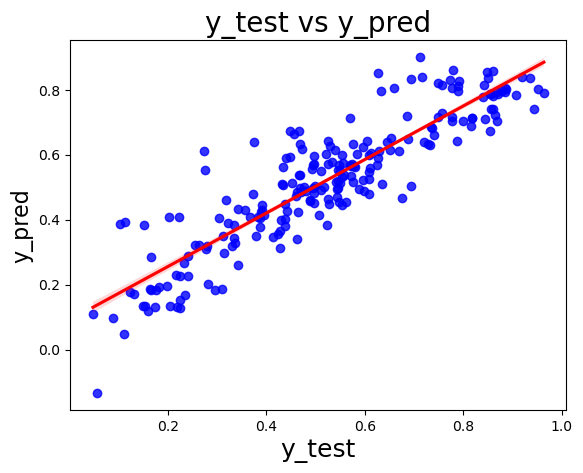

In [81]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparision

* Training Data R-squared:                       0.833
* Training Data Adj. R-squared:                  0.830
* Test Data R-squared :                          0.8032
* Test Data Adj. R- squared:                     0.7938

Demand for bikes depend on yr, temp , windspeed , season_spring, season_summer, season_winter, mnth_sep ,weekday_sun,weathersit_Light_snowrain and weathersit_Misty